#### Imports e Pre-Settings

In [1]:
import os
import glob

from scipy.interpolate import interp1d
import numpy as np
import pandas as pd

from bokeh import palettes
import seaborn as sns
import matplotlib.pyplot as plt

#### Lendo todos os .txt do diretório

In [2]:
path = !pwd
path = path[0]

os.chdir(path)
txts = glob.glob('*.{}'.format('txt'))
txts.sort()

#### Transformando txts em dataframes

In [3]:
dfs = [pd.read_csv(txt, sep='\t', skiprows=2, header=None) for txt in txts]

for df in dfs:
    df.dropna(axis=1, inplace=True)
    df.columns = ['x', 'E']

#### Plotando

In [4]:
colors = palettes.viridis(5)
vps = 2, 4, 6, 8, 10

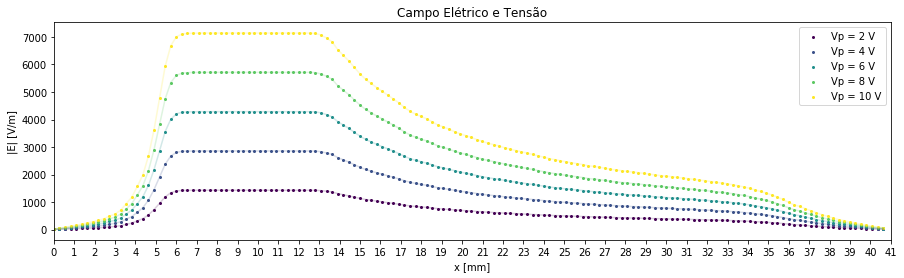

In [5]:
f, ax = plt.subplots(figsize=(15, 4))

for df, vp, color in zip(dfs, vps, colors):
    ax.scatter(df.x, df.E, s=4, label='Vp = {} V'.format(vp), color=color)
    ax.plot(df.x, df.E, color=color, label='', alpha=.2)

ax.set_xticks(np.arange(0, 45, 1))
ax.set_xlim(0, 41)
ax.set_title('Campo Elétrico e Tensão')
ax.set_ylabel('|E| [V/m]')
ax.set_xlabel('x [mm]')
ax.legend(loc='upper right', prop={'size': 10});

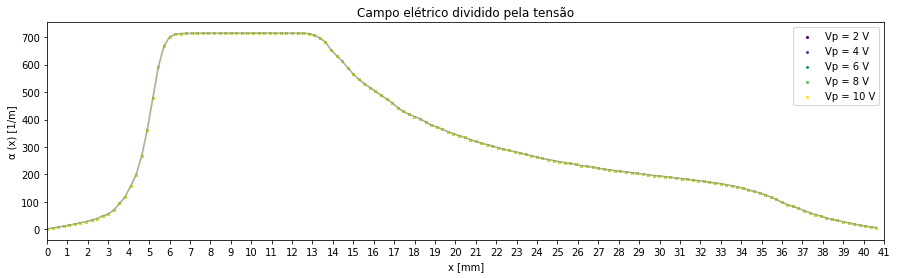

In [6]:
f, ax = plt.subplots(figsize=(15, 4))

for df, vp, color in zip(dfs, vps, colors):
    ax.scatter(df.x, df.E/vp, s=4, label='Vp = {} V'.format(vp), color=color)
    ax.plot(df.x, df.E/vp, color=color, label='', alpha=.2)

ax.set_xticks(np.arange(0, 45, 1))
ax.set_xlim(0, 41)
ax.set_title('Campo elétrico dividido pela tensão')
ax.set_ylabel('α (x) [1/m]')
ax.set_xlabel('x [mm]')
ax.legend(loc='upper right', prop={'size': 10});

Podemos tomar qualquer simulação, já que todas as retas caem exatamente no mesmo lugar.

#### Interpolação

In [7]:
x = dfs[0].x
y = dfs[0].E / 2

In [8]:
func_alpha = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 40, num=200, endpoint=True)

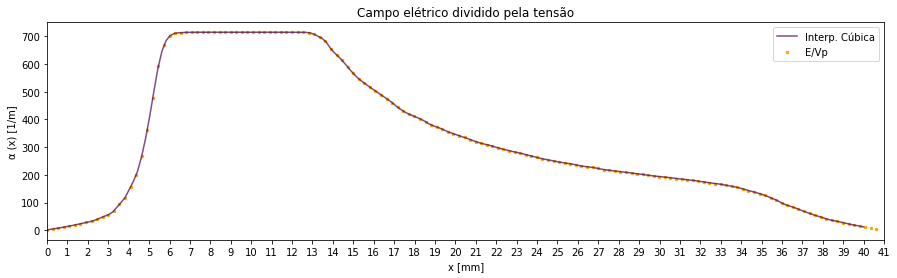

In [9]:
fig, ax = plt.subplots(figsize=(15, 4))

ax.scatter(x, y, s=6, color='orange', label='E/Vp')
ax.plot(xnew, func_alpha(xnew), ls='-', color=colors[0], alpha=.7, label='Interp. Cúbica')

ax.set_xticks(np.arange(0, 45, 1))
ax.set_xlim(0, 41)
ax.set_title('Campo elétrico dividido pela tensão')
ax.set_ylabel('α (x) [1/m]')
ax.set_xlabel('x [mm]')
ax.legend(loc='upper right', prop={'size': 10});

In [10]:
func_alpha